In [45]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [46]:
#importing final dataset for training
df_dev = pd.read_csv(r'D:\Coding\projects\usurious_sisters\final_dataset\final_data_v1.csv')
df_dev.head()

,ID,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,...,dummy_WEST BENGAL,SUM(DISBURSED-AMT/HIGH CREDIT),SUM(CURRENT-BAL),OTHERS-DISBURSED,Disbursal_Dt,Maturity_Dt,Auth_Dt,Disbursal_Dt_U,Maturity_Dt_U,Auth_Dt_U
0,1,1,48,450000,275000.0,275000.0,24000.0,4022465,1568,21946,...,0,2201352.0,618526.0,1926352.0,2012-02-10,2016-01-15,2012-02-10,1.328812e+09,1.452796e+09,1.328812e+09
1,2,333,47,485000,350000.0,350000.0,10500.0,4681175,1062,34802,...,0,18117081.0,10349457.0,17767081.0,2012-03-31,2016-02-15,2012-03-31,1.333132e+09,1.455475e+09,1.333132e+09
2,3,1,68,690000,519728.0,519728.0,38300.0,25328146,1060,127335,...,0,3708369.0,2065165.0,3188641.0,2017-06-17,2023-02-10,2017-06-17,1.497638e+09,1.675967e+09,1.497638e+09
3,7,125,48,480000,400000.0,400000.0,11600.0,13021591,1060,25094,...,0,1272553.0,624000.0,872553.0,2013-11-29,2017-11-10,2013-11-29,1.385663e+09,1.510252e+09,1.385663e+09
4,8,152,44,619265,440000.0,440000.0,15000.0,3291320,1046,21853,...,0,2025216.0,974119.0,1585216.0,2011-12-08,2015-07-05,2011-12-08,1.323283e+09,1.436035e+09,1.323283e+09


In [47]:
#printing column names
df_dev.columns

Index(['ID', 'BranchID', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'AssetID', 'ManufacturerID', 'SupplierID',
       'LTV', 'AGE', 'MonthlyIncome', 'ZiPCODE', 'ASSN_CAT', 'LOAN_STATUS',
       'INS_MODE', 'dummy_BI-Monthly', 'dummy_Half Yearly', 'dummy_Monthly',
       'dummy_Quatrly', 'dummy_automated', 'dummy_cheque',
       'dummy_discretionary', 'dummy_reject', 'dummy_ANDHRA PRADESH',
       'dummy_ASSAM', 'dummy_BIHAR', 'dummy_CHANDIGARH', 'dummy_CHATTISGARH',
       'dummy_DADRA AND NAGAR HAVELI', 'dummy_DELHI', 'dummy_GUJARAT',
       'dummy_HARYANA', 'dummy_HIMACHAL PRADESH', 'dummy_JHARKHAND',
       'dummy_KARNATAKA', 'dummy_MADHYA PRADESH', 'dummy_MAHARASHTRA',
       'dummy_ORISSA', 'dummy_PUNJAB', 'dummy_RAJASTHAN', 'dummy_TAMIL NADU',
       'dummy_TELANGANA', 'dummy_UTTAR PRADESH', 'dummy_UTTARAKHAND',
       'dummy_WEST BENGAL', 'SUM(DISBURSED-AMT/HIGH CREDIT)',
       'SUM(CURRENT-BAL)', 'OTHERS-DISBURSED', 'Disbursal_Dt', 'Maturity_Dt',


In [48]:
#creating X and Y variables for model
X_miss_xgb = df_dev[['ID', 'BranchID', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'AssetID', 'ManufacturerID', 'SupplierID',
       'LTV', 'AGE', 'MonthlyIncome', 'ZiPCODE', 'LOAN_STATUS',
       'INS_MODE', 'dummy_BI-Monthly', 'dummy_Half Yearly', 'dummy_Monthly',
       'dummy_Quatrly', 'dummy_automated', 'dummy_cheque',
       'dummy_discretionary', 'dummy_reject', 'dummy_ANDHRA PRADESH',
       'dummy_ASSAM', 'dummy_BIHAR', 'dummy_CHANDIGARH', 'dummy_CHATTISGARH',
       'dummy_DADRA AND NAGAR HAVELI', 'dummy_DELHI', 'dummy_GUJARAT',
       'dummy_HARYANA', 'dummy_HIMACHAL PRADESH', 'dummy_JHARKHAND',
       'dummy_KARNATAKA', 'dummy_MADHYA PRADESH', 'dummy_MAHARASHTRA',
       'dummy_ORISSA', 'dummy_PUNJAB', 'dummy_RAJASTHAN', 'dummy_TAMIL NADU',
       'dummy_TELANGANA', 'dummy_UTTAR PRADESH', 'dummy_UTTARAKHAND',
       'dummy_WEST BENGAL', 'SUM(DISBURSED-AMT/HIGH CREDIT)',
       'SUM(CURRENT-BAL)', 'OTHERS-DISBURSED', 'Disbursal_Dt_U', 'Maturity_Dt_U', 'Auth_Dt_U']]
Y_miss_xgb = df_dev[["ASSN_CAT"]]

In [49]:
#confused - what does this step do?
data_dm = xgb.DMatrix(data=X_miss_xgb, label = Y_miss_xgb)

In [50]:
#creating train test split
X_miss_xgb_train, X_miss_xgb_cv, Y_miss_xgb_train, Y_miss_xgb_cv = train_test_split(X_miss_xgb,Y_miss_xgb,test_size = 0.333, random_state = 123)

In [51]:
#defining xgb hyper-parameters
xg_class = xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 1,gamma = 1,
                             subsample = 0.5, learning_rate = 0.60, max_depth = 2, alpha = 10,
                             n_estimators = 200, multilabel_ =True, num_classes = 3,max_delta_step = 1)

In [52]:
#training the model
xg_class.fit(X_miss_xgb_train, Y_miss_xgb_train)

[18:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { multilabel_, num_classes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=1, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              multilabel_=True, n_estimators=200, n_jobs=4, num_classes=3,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

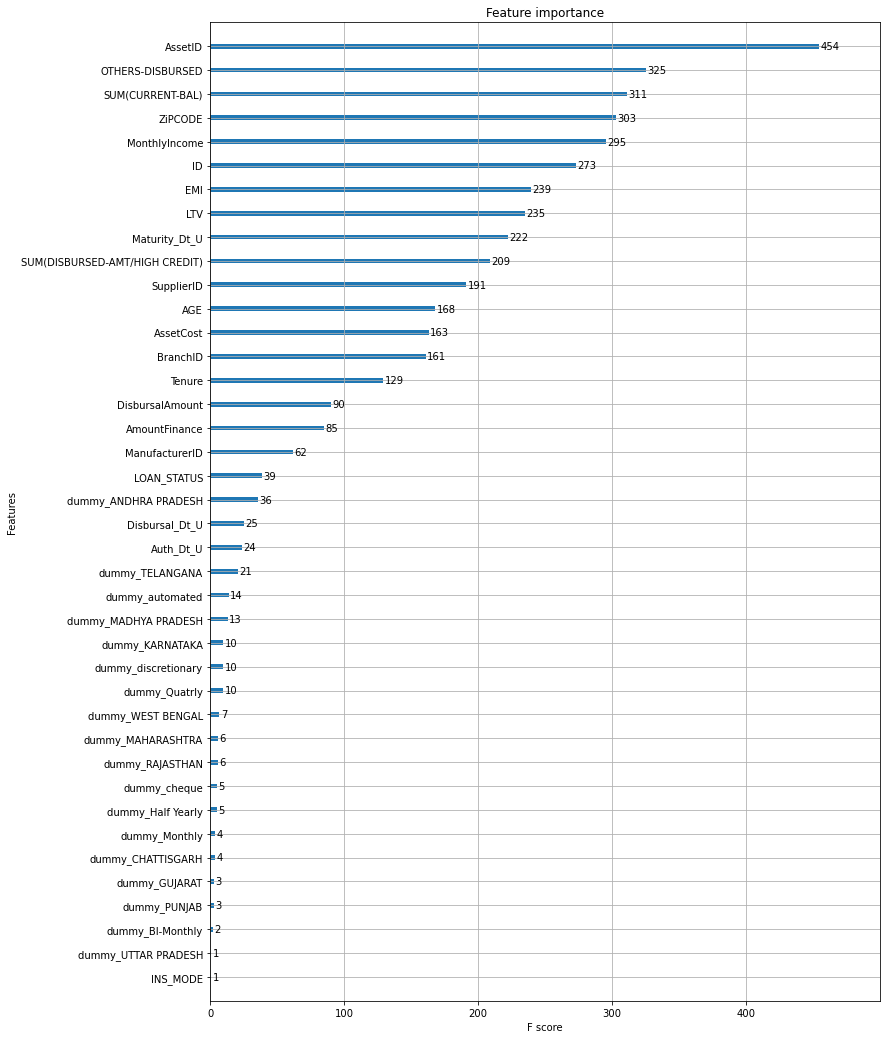

In [53]:
#generating feature importance plot
xgb.plot_importance(xg_class)
plt.rcParams['figure.figsize'] = [12,18]
plt.show()

## Testing on Cross Validation Set

In [54]:
#testing on cross validation set
preds_miss_xgb = xg_class.predict(X_miss_xgb_cv)

In [55]:
preds_miss_xgb_df = pd.DataFrame(preds_miss_xgb)
preds_miss_xgb_df.rename(columns = {0:'predictions'},inplace = True)

In [56]:
Y_miss_xgb_test_nind = Y_miss_xgb_cv.reset_index()
Y_miss_xgb_test_nind.drop(['index'],axis = 1, inplace = True)
preds_actuals_df = pd.concat([Y_miss_xgb_test_nind, preds_miss_xgb_df], axis = 1)
preds_actuals_df

,ASSN_CAT,predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,5,0
...,...,...
42838,0,0
42839,0,6
42840,6,0
42841,0,0


In [57]:
#calculating the f1 score
score = sklearn.metrics.f1_score(preds_actuals_df['ASSN_CAT'],preds_actuals_df['predictions'], average = 'weighted')
print(score)

0.7804946517792443


## Testing on Test dataset 

In [58]:
#reading the test dataset final
df_test = pd.read_csv(r"D:\Coding\projects\usurious_sisters\final_dataset\final_data_test.csv")

In [59]:
#removing the date format dates, only unix timestamps now remain
df_test_f = df_test[['ID', 'BranchID', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'AssetID', 'ManufacturerID', 'SupplierID',
       'LTV', 'AGE', 'MonthlyIncome', 'ZiPCODE', 'LOAN_STATUS',
       'INS_MODE', 'dummy_BI-Monthly', 'dummy_Half Yearly', 'dummy_Monthly',
       'dummy_Quatrly', 'dummy_automated', 'dummy_cheque',
       'dummy_discretionary', 'dummy_reject', 'dummy_ANDHRA PRADESH',
       'dummy_ASSAM', 'dummy_BIHAR', 'dummy_CHANDIGARH', 'dummy_CHATTISGARH',
       'dummy_DADRA AND NAGAR HAVELI', 'dummy_DELHI', 'dummy_GUJARAT',
       'dummy_HARYANA', 'dummy_HIMACHAL PRADESH', 'dummy_JHARKHAND',
       'dummy_KARNATAKA', 'dummy_MADHYA PRADESH', 'dummy_MAHARASHTRA',
       'dummy_ORISSA', 'dummy_PUNJAB', 'dummy_RAJASTHAN', 'dummy_TAMIL NADU',
       'dummy_TELANGANA', 'dummy_UTTAR PRADESH', 'dummy_UTTARAKHAND',
       'dummy_WEST BENGAL', 'SUM(DISBURSED-AMT/HIGH CREDIT)',
       'SUM(CURRENT-BAL)', 'OTHERS-DISBURSED', 'Disbursal_Dt_U', 'Maturity_Dt_U', 'Auth_Dt_U']]

In [60]:
preds_xgb_leader = xg_class.predict(df_test_f)
preds_xgb_leader = pd.DataFrame(preds_xgb_leader)

In [61]:
print(preds_xgb_leader.shape)
preds_xgb_leader.tail()

(14745, 1)


,0
14740,0
14741,0
14742,0
14743,0
14744,0


In [62]:
#QC
preds_xgb_leader[0].unique()
#pass - we have all the values we needed

array([0, 6, 4, 5, 2, 3, 1], dtype=int64)

In [63]:
preds_xgb_leader.rename(columns={0:'predictions_numeric'}, inplace = True)

In [64]:
#formatting preds_xgb_leader dataframe - changing column names and assigning the required bucket values.
preds_xgb_leader['predictions_categorical'] = 1000
preds_xgb_leader.loc[preds_xgb_leader['predictions_numeric']==0, 'predictions_categorical'] = "No Top-up Service"
preds_xgb_leader.loc[preds_xgb_leader['predictions_numeric']==1, 'predictions_categorical'] = "12-18 Months"
preds_xgb_leader.loc[preds_xgb_leader['predictions_numeric']==2, 'predictions_categorical'] = "18-24 Months"
preds_xgb_leader.loc[preds_xgb_leader['predictions_numeric']==3, 'predictions_categorical'] = "24-30 Months"
preds_xgb_leader.loc[preds_xgb_leader['predictions_numeric']==4, 'predictions_categorical'] = "30-36 Months"
preds_xgb_leader.loc[preds_xgb_leader['predictions_numeric']==5, 'predictions_categorical'] = "36-48 Months"
preds_xgb_leader.loc[preds_xgb_leader['predictions_numeric']==6, 'predictions_categorical'] = " > 48 Months"

In [65]:
#QC
preds_xgb_leader.predictions_categorical.unique()
#pass

array(['No Top-up Service', ' > 48 Months', '30-36 Months',
       '36-48 Months', '18-24 Months', '24-30 Months', '12-18 Months'],
      dtype=object)

In [66]:
preds_xgb_leader.head()

,predictions_numeric,predictions_categorical
0,0,No Top-up Service
1,0,No Top-up Service
2,0,No Top-up Service
3,0,No Top-up Service
4,0,No Top-up Service


In [67]:
#importing the submissions template csv
submission_df = pd.read_csv(r'D:\Coding\projects\usurious_sisters\submissions\submission_template.csv')
print(submission_df.shape)
submission_df.head()

(14745, 1)


,ID
0,4
1,5
2,6
3,25
4,119


In [68]:
#attaching the predictions columns
submission_df = pd.concat([submission_df, preds_xgb_leader], axis = 1)
submission_df.head()

,ID,predictions_numeric,predictions_categorical
0,4,0,No Top-up Service
1,5,0,No Top-up Service
2,6,0,No Top-up Service
3,25,0,No Top-up Service
4,119,0,No Top-up Service


In [69]:
#renaming columns and deleting predictions_numeric
submission_df.drop(['predictions_numeric'], axis = 1, inplace = True)
submission_df.rename(columns={'predictions_categorical':'Top-up Month'}, inplace = True)

In [70]:
submission_df.head()

,ID,Top-up Month
0,4,No Top-up Service
1,5,No Top-up Service
2,6,No Top-up Service
3,25,No Top-up Service
4,119,No Top-up Service


In [71]:
#saving the csv file
submission_df.to_csv(r'D:\Coding\projects\usurious_sisters\submissions\submission_3.csv', index = False)